<a href="https://colab.research.google.com/github/snejokart/snejokart/blob/main/fire_defind.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import tensorflow as tf
from keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy
from keras.callbacks import EarlyStopping,  ModelCheckpoint
from matplotlib import pyplot as plt
from keras.preprocessing.image import load_img, img_to_array
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import time

# from keras.applications import MobileNetV2
# from keras import Model

In [20]:
datagen = ImageDataGenerator(
        rescale=1 / 255.0, # Параметры аугментации
        rotation_range=40,
        zoom_range=0.05,
        width_shift_range=0.05,
        height_shift_range=0.05,
        shear_range=0.05,
        horizontal_flip=True,
        fill_mode="nearest",
        validation_split=0.20)

In [21]:
train_generator = datagen.flow_from_directory(
    directory='/content/drive/MyDrive/Colab Notebooks/fire_dataset',
    target_size=(224, 224),
    class_mode='categorical',
    color_mode='rgb',
    subset='training',
    shuffle=True,
    seed=42)

valid_generator = datagen.flow_from_directory(
    directory='/content/drive/MyDrive/Colab Notebooks/fire_dataset',
    target_size=(224, 224),
    class_mode='categorical',
    color_mode='rgb',
    subset='validation',
    shuffle=True,
    seed=42)

Found 992 images belonging to 2 classes.
Found 247 images belonging to 2 classes.


In [16]:
model = models.Sequential()
model.add(layers.Conv2D(16, (11, 11), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D(3, 3))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(16, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.BatchNormalization())
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(2, activation='softmax'))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 214, 214, 32)        │          11,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 71, 71, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 71, 71, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 67, 67, 32)          │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 33, 33, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 33, 33, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 31, 31, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 15, 15, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 13, 13, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 6, 6, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │             514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,994 (1.35 MB)

 Trainable params: 352,226 (1.34 MB)

 Non-trainable params: 768 (3.00 KB)

In [17]:
model.compile(
    optimizer=Adam(),
    loss=CategoricalCrossentropy(),
    metrics=['accuracy'])

In [18]:
callback = EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=5,
    callbacks=[callback])

Epoch 1/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 198s 7s/step - accuracy: 0.8360 - loss: 0.4628 - val_accuracy: 0.6986 - val_loss: 0.5158
Epoch 2/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 188s 6s/step - accuracy: 0.9522 - loss: 0.1411 - val_accuracy: 0.7808 - val_loss: 0.4329
Epoch 3/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 203s 6s/step - accuracy: 0.9309 - loss: 0.1801 - val_accuracy: 0.7626 - val_loss: 0.4401
Epoch 4/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 189s 6s/step - accuracy: 0.9363 - loss: 0.1454 - val_accuracy: 0.7626 - val_loss: 0.5997
Epoch 5/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 196s 7s/step - accuracy: 0.9517 - loss: 0.1047 - val_accuracy: 0.7534 - val_loss: 0.6935


Точность на обучении: 94.52%
Точность на валидации: 83.56%


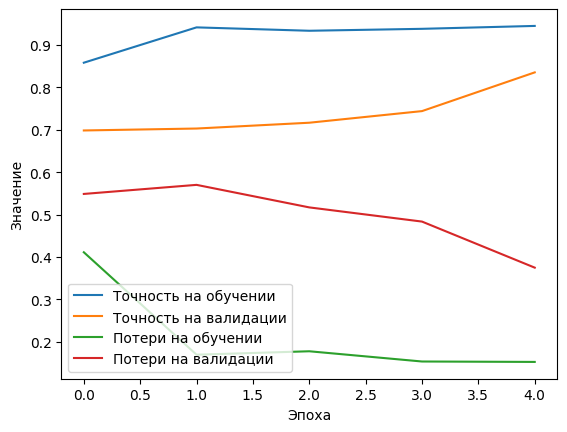

In [ ]:
plt.plot(history.history['accuracy'], label="Точность на обучении")
plt.plot(history.history['val_accuracy'], label="Точность на валидации")
plt.plot(history.history['loss'], label="Потери на обучении")
plt.plot(history.history['val_loss'], label="Потери на валидации")
plt.xlabel("Эпоха")
plt.ylabel("Значение")
plt.legend()

train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
print(f"Точность на обучении: {train_accuracy[-1] * 100:.2f}%")
print(f"Точность на валидации: {val_accuracy[-1] * 100:.2f}%")

In [ ]:
callback = EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=10,
    callbacks=[callback])

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


28/28 ━━━━━━━━━━━━━━━━━━━━ 364s 11s/step - accuracy: 0.8021 - loss: 0.5856 - val_accuracy: 0.6986 - val_loss: 0.5848
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 155s 5s/step - accuracy: 0.9187 - loss: 0.2045 - val_accuracy: 0.7626 - val_loss: 0.4591
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 150s 5s/step - accuracy: 0.9102 - loss: 0.2291 - val_accuracy: 0.7215 - val_loss: 0.5696
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 160s 5s/step - accuracy: 0.9239 - loss: 0.1769 - val_accuracy: 0.7626 - val_loss: 0.5078
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 197s 5s/step - accuracy: 0.9548 - loss: 0.1069 - val_accuracy: 0.8447 - val_loss: 0.3316
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 198s 5s/step - accuracy: 0.9484 - loss: 0.1403 - val_accuracy: 0.8082 - val_loss: 0.4572
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 151s 5s/step - accuracy: 0.9633 - loss: 0.0950 - val_accuracy: 0.8082 - val_loss: 0.4906
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 167s 6s/step - accuracy: 0.9440 - loss: 0.2297 - val_accuracy: 0.8995 - val_loss: 0

Точность на обучении: 94.52%
Точность на валидации: 75.34%


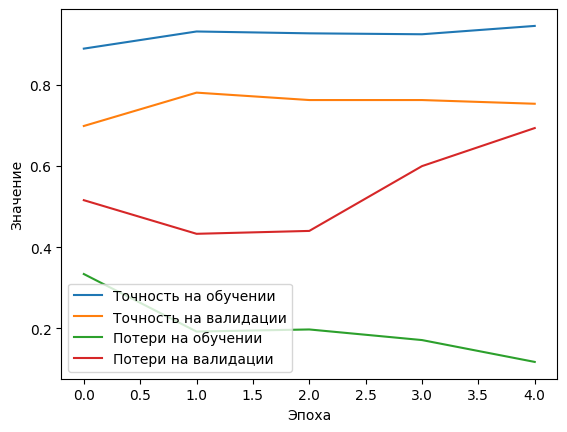

In [19]:
plt.plot(history.history['accuracy'], label="Точность на обучении")
plt.plot(history.history['val_accuracy'], label="Точность на валидации")
plt.plot(history.history['loss'], label="Потери на обучении")
plt.plot(history.history['val_loss'], label="Потери на валидации")
plt.xlabel("Эпоха")
plt.ylabel("Значение")
plt.legend()


train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
print(f"Точность на обучении: {train_accuracy[-1] * 100:.2f}%")
print(f"Точность на валидации: {val_accuracy[-1] * 100:.2f}%")

In [ ]:
model.save('best_model3.keras')

In [ ]:
from tensorflow.keras.models import load_model

best_model = load_model('best_model3.keras')

7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.9201 - loss: 0.2156
Загруженная модель - Loss: 0.1924125701189041, Accuracy: 0.931506872177124
